In [1]:
from pandas import read_csv

transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
transactions

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,...,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
0,0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501954,501954,3488954,0,13151575,29.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501955,501955,3488955,0,13151580,312.95,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501956,501956,3488956,0,13151717,774.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501957,501957,3488957,0,13151720,226.00,W,7919,194.0,150.0,mastercard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Particionar dataframe

In [3]:
data_set_train = transactions.drop(range(501959 * 70 // 100, 501959))
data_set_validation = transactions.drop(range(501959 * 70 // 100)).reset_index().drop('index', axis=1)
target_train = data_set_train.target
target_validation = data_set_validation.target

Aislar columnas innecesarias

In [4]:
data_set_train = data_set_train.drop(["Unnamed: 0", "target", "Id"], axis=1)
data_set_validation= data_set_validation.drop(["Unnamed: 0", "target", "Id"], axis=1)

Chequeo de datos

In [6]:
data_set_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351371 entries, 0 to 351370
Columns: 392 entries, timestamp to D339
dtypes: float64(376), int64(2), object(14)
memory usage: 1.0+ GB


In [7]:
data_set_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150588 entries, 0 to 150587
Columns: 392 entries, timestamp to D339
dtypes: float64(376), int64(2), object(14)
memory usage: 450.4+ MB


In [8]:
data_set_train.select_dtypes("object")

,product_category,feat_card_4,feat_card_6,payer_email_domain,receiver_email_domain,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351366,W,visa,debit,yahoo.com,NaN,T,T,T,M0,T,F,F,F,T
351367,W,mastercard,debit,aol.com,NaN,T,T,T,M0,T,F,F,F,T
351368,W,mastercard,debit,gmail.com,NaN,T,T,T,M0,F,T,NaN,NaN,NaN
351369,C,mastercard,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Encoding de las variables categoricas

In [9]:
variables_categoricas = ["product_category", "feat_card_4", "feat_card_6", "payer_email_domain", "receiver_email_domain", 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

In [10]:
cantidades_categoricas = {}

for variable in variables_categoricas:
    cantidades_categoricas[variable] = data_set_train[variable].nunique()

cantidades_categoricas

{'product_category': 5,
 'feat_card_4': 4,
 'feat_card_6': 4,
 'payer_email_domain': 59,
 'receiver_email_domain': 60,
 'C1': 2,
 'C2': 2,
 'C3': 2,
 'C4': 3,
 'C5': 2,
 'C6': 2,
 'C7': 2,
 'C8': 2,
 'C9': 2}

In [11]:
import category_encoders as ce

for variable in variables_categoricas:
    target_encoder = ce.TargetEncoder(cols=variable)
    data_set_train[variable] = target_encoder.fit_transform(data_set_train[variable], data_set_train.timestamp)
    data_set_validation[variable] = target_encoder.transform(data_set_validation[variable], data_set_validation.timestamp)

Normalizacion y Manejo de NaN

In [12]:
for variable in data_set_train.columns.to_list():
    promedio = data_set_train[variable].mean()
    desvio = data_set_train[variable].std()

    data_set_train[variable] = data_set_train[variable].fillna(promedio)
    
    if desvio != 0:
        data_set_train[variable] = data_set_train[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_train[variable] = data_set_train[variable].map(lambda x: x - promedio)

    promedio = data_set_validation[variable].mean()
    desvio = data_set_validation[variable].std()
    
    data_set_validation[variable] = data_set_validation[variable].fillna(promedio)

    if desvio != 0:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: x - promedio)

CountVectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

cv = CountVectorizer()
payer_train = cv.fit_transform(transactions['payer_email_domain'].drop(range(501959 * 70 // 100, 501959)).fillna('NULO')).toarray()
payer_validation = cv.transform(transactions['payer_email_domain'].drop(range(501959 * 70 // 100)).fillna('NULO')).toarray()
 
payer_train_df = pd.DataFrame(data=payer_train, columns= cv.get_feature_names_out())
payer_validation_df = pd.DataFrame(data=payer_validation, columns= cv.get_feature_names_out())


In [14]:
cv = CountVectorizer()
receiver_train = cv.fit_transform(transactions['receiver_email_domain'].drop(range(501959 * 70 // 100, 501959)).fillna('NULO')).toarray()
receiver_validation = cv.transform(transactions['receiver_email_domain'].drop(range(501959 * 70 // 100)).fillna('NULO')).toarray()
 
receiver_train_df = pd.DataFrame(data=receiver_train, columns= cv.get_feature_names_out())
receiver_validation_df = pd.DataFrame(data=receiver_validation, columns= cv.get_feature_names_out())

In [15]:
CV_email_train = payer_train_df + receiver_train_df
CV_email_validation = payer_validation_df + receiver_validation_df

In [16]:
data_set_train = pd.concat([data_set_train, CV_email_train], axis=1)
data_set_validation = pd.concat([data_set_validation, CV_email_validation], axis=1)

In [17]:
for variable in CV_email_train.columns.to_list():
    promedio = data_set_train[variable].mean()
    desvio = data_set_train[variable].std()

    data_set_train[variable] = data_set_train[variable].fillna(promedio)
    
    if desvio != 0:
        data_set_train[variable] = data_set_train[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_train[variable] = data_set_train[variable].map(lambda x: x - promedio)

In [18]:
for variable in CV_email_validation.columns.to_list():
    promedio = data_set_validation[variable].mean()
    desvio = data_set_validation[variable].std()
    
    data_set_validation[variable] = data_set_validation[variable].fillna(promedio)

    if desvio != 0:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: (x - promedio) / desvio)
    else:
        data_set_validation[variable] = data_set_validation[variable].map(lambda x: x - promedio)

In [19]:
data_set_train

,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,...,servicios,suddenlink,ta,twc,uk,verizon,web,windstream,yahoo,ymail
0,-1.572623,-0.276688,0.520869,0.829414,0.000000,-0.281267,-1.459665,-1.430880,-1.439709,0.237351,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
1,-1.572623,-0.442603,0.520869,-1.448865,0.251167,-0.281267,0.444449,-2.417424,-1.439709,0.335357,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
2,-1.572596,-0.316591,0.520869,-1.059736,0.794778,-0.281267,-0.102395,-0.838954,0.503389,0.384360,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
3,-1.572584,-0.354395,0.520869,1.687210,1.281499,-0.281267,0.444449,-2.047470,0.503389,1.815245,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,1.847309,-0.063473
4,-1.572582,-0.354395,-2.613709,-1.093591,0.946483,-0.281267,0.444449,-2.417424,-1.439709,1.266412,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351366,1.783480,-0.335493,0.520869,0.578357,0.794778,-0.281267,-0.102395,0.640862,0.503389,0.335357,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,1.847309,-0.063473
351367,1.783502,-0.358595,0.520869,0.167814,0.946483,-0.281267,0.444449,0.591535,0.503389,0.080542,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
351368,1.783511,-0.072969,0.520869,1.467560,0.181636,-0.281267,0.444449,-2.047470,0.503389,0.384360,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473
351369,1.783540,-0.348695,-0.077751,-1.367490,0.276452,2.799442,0.444449,0.591535,0.503389,0.000000,...,-0.007913,-0.01571,-0.007913,-0.019901,-0.014278,-0.071967,-0.018865,-0.022674,-0.454978,-0.063473


XGBoost

In [20]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [21]:
modelo_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.4, colsample_bytree=0.6, objective='binary:logistic', alpha=18, gamma=16, reg_lambda=15, n_jobs=5)

In [22]:
modelo_xgb.fit(data_set_train, target_train)

XGBClassifier(alpha=18, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=16, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=5,
              num_parallel_tree=None, ...)

In [23]:
target_train_predict = modelo_xgb.predict(data_set_validation)

In [24]:
target_validation = target_validation.astype(int)

In [25]:
matriz_confusion = confusion_matrix(target_validation, target_train_predict)
matriz_confusion

array([[144370,    525],
       [  4273,   1420]])

<function matplotlib.pyplot.show(close=None, block=None)>

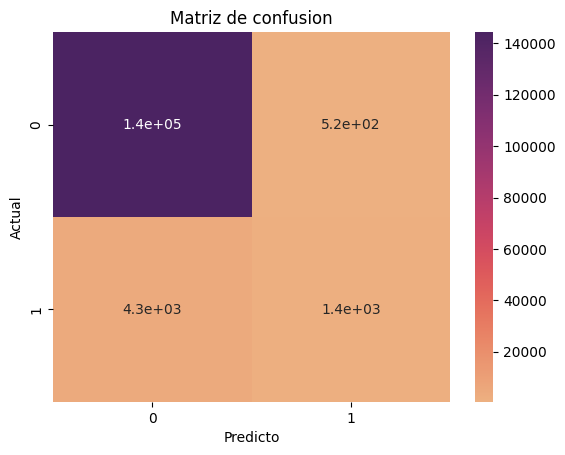

In [26]:
sns.heatmap(matriz_confusion, annot=True, cmap='flare')
plt.title("Matriz de confusion")
plt.xlabel('Predicto')
plt.ylabel('Actual')
plt.show

In [27]:
accuracy_score(target_validation, target_train_predict)

0.9681382314659867

In [28]:
especificidad = matriz_confusion[0][0] / sum(matriz_confusion[0])
especificidad

np.float64(0.9963766865661341)

In [29]:
sensibilidad = matriz_confusion[1][1] / sum(matriz_confusion[1])
sensibilidad

np.float64(0.24942912348498156)

In [30]:
target_train_predict = target_train_predict.astype(str)
target_validation = target_validation.astype(str)

In [31]:
target_probabilidad = modelo_xgb.predict_proba(data_set_validation)[:, 1]

In [32]:
roc_auc_score(target_validation, target_probabilidad)

np.float64(0.8211032166111771)

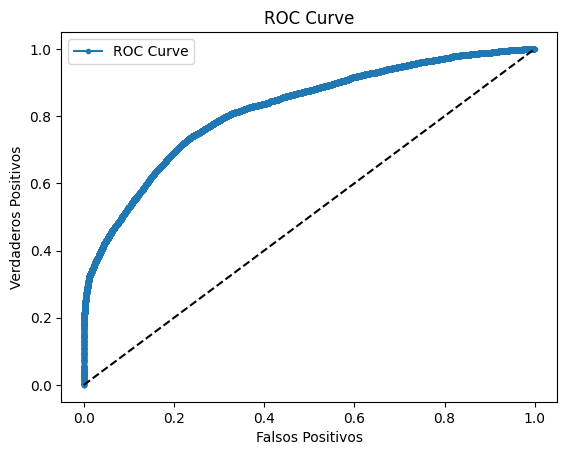

In [33]:
target_validation = target_validation.astype(int)

falsos_pos, verdaderos_pos, umbrales = roc_curve(target_validation, target_probabilidad)
roc_auc = auc(falsos_pos, verdaderos_pos)

plt.plot(falsos_pos, verdaderos_pos, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

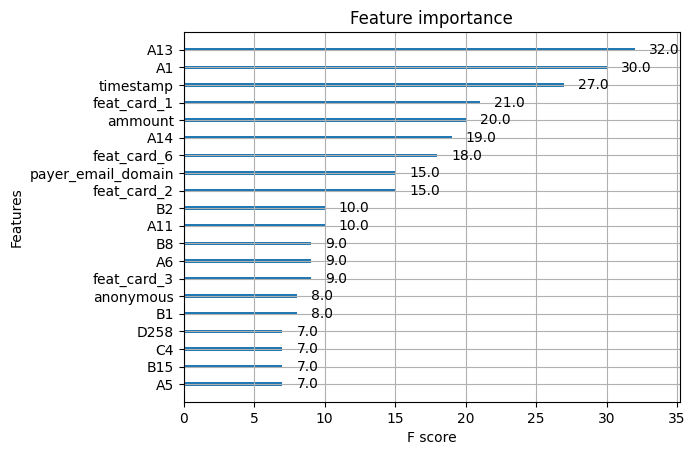

In [34]:
xgb.plot_importance(modelo_xgb,max_num_features=20)

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
modelo_rf = RandomForestClassifier(class_weight='balanced', max_leaf_nodes=10, n_estimators=25, max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=37, n_jobs=5)

In [37]:
modelo_rf.fit(data_set_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=10,
                       min_samples_leaf=2, min_samples_split=4, n_estimators=25,
                       n_jobs=5, random_state=37)

In [38]:
target_train_predict = modelo_rf.predict(data_set_validation)

In [39]:
target_validation = target_validation.astype(int)

In [40]:
matriz_confusion = confusion_matrix(target_validation, target_train_predict)
matriz_confusion

array([[73244, 71651],
       [  693,  5000]])

<function matplotlib.pyplot.show(close=None, block=None)>

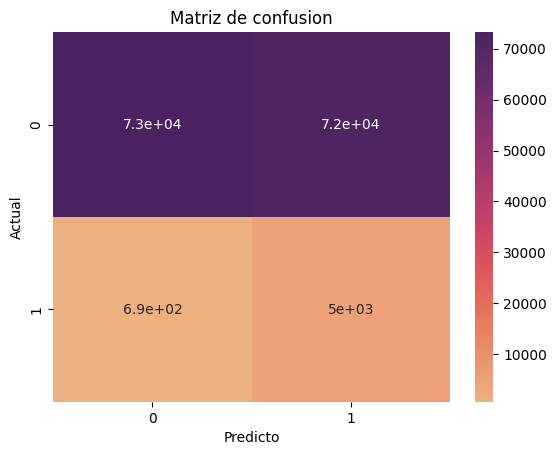

In [41]:
sns.heatmap(matriz_confusion, annot=True, cmap='flare')
plt.title("Matriz de confusion")
plt.xlabel('Predicto')
plt.ylabel('Actual')
plt.show

In [42]:
accuracy_score(target_validation, target_train_predict)

0.5195898743591787

In [43]:
especificidad = matriz_confusion[0][0] / sum(matriz_confusion[0])
especificidad

np.float64(0.5054970840953794)

In [44]:
sensibilidad = matriz_confusion[1][1] / sum(matriz_confusion[1])
sensibilidad

np.float64(0.8782715615668365)

In [45]:
target_train_predict = target_train_predict.astype(str)
target_validation = target_validation.astype(str)

In [46]:
target_probabilidad = modelo_rf.predict_proba(data_set_validation)[:, 1]

In [47]:
roc_auc_score(target_validation, target_probabilidad)

np.float64(0.822186131902017)

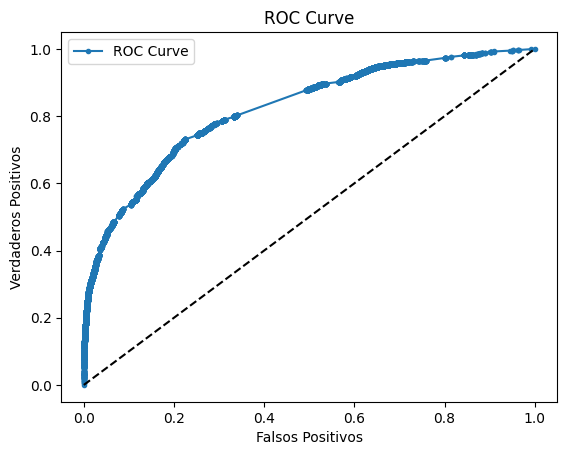

In [48]:
target_validation = target_validation.astype(int)

falsos_pos, verdaderos_pos, umbrales = roc_curve(target_validation, target_probabilidad)
roc_auc = auc(falsos_pos, verdaderos_pos)

plt.plot(falsos_pos, verdaderos_pos, marker='.', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()
plt.show()